## The Trie Data Structure


1️⃣ What is a Trie?

A Trie (pronounced “try”) is a tree-based data structure used to store strings in a way that allows efficient prefix-based search.

It is also called a Prefix Tree.

Core Idea:

    - Each node represents a character

    - The path from root → node forms a prefix

    - Words sharing prefixes share the same path

Example words:
["cat", "car", "care", "dog"]

The words "cat", "car", "care" share prefix "ca" — so they share nodes.

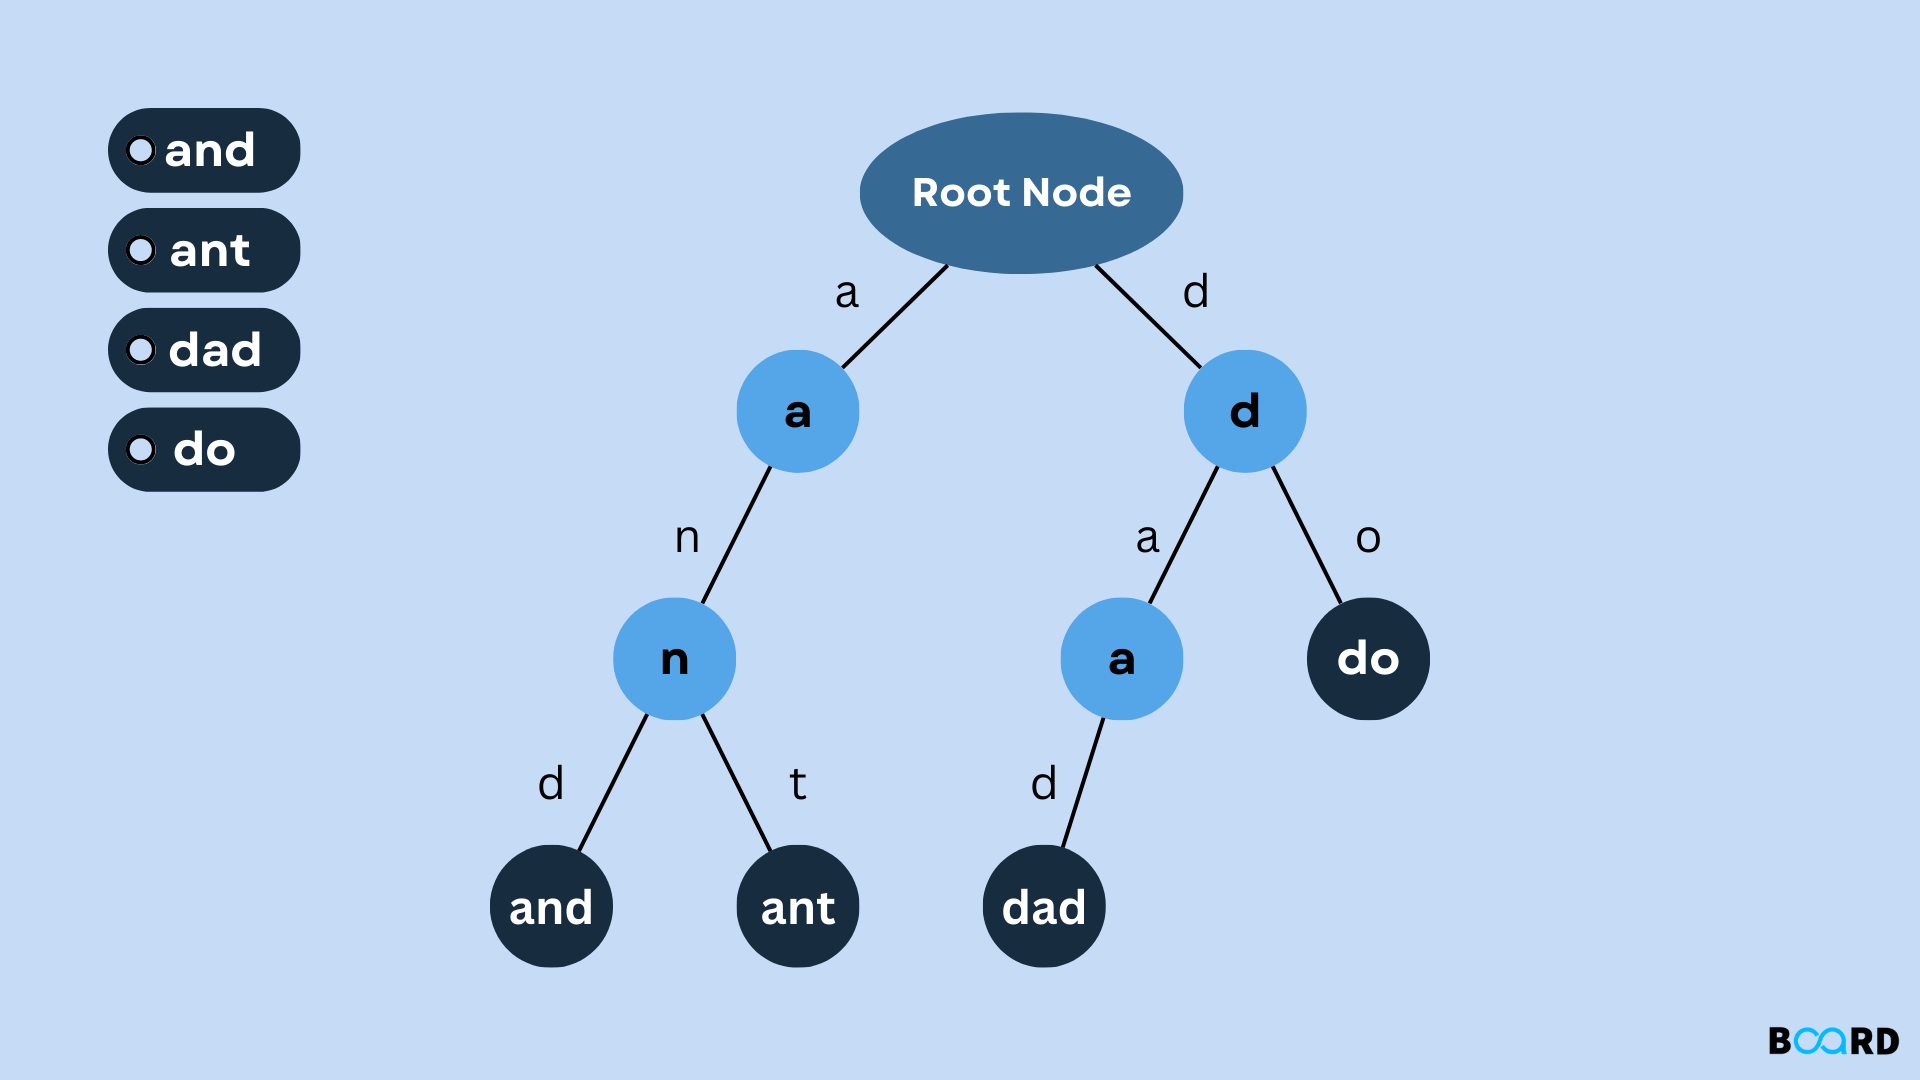


2️⃣ Why Use a Trie?
Instead of storing words in:

    A list → O(n) search

    A hash map → exact match only

Trie allows:

    Fast prefix search

    Auto-complete

    Spell-check

    Word suggestions


3️⃣ Structure of a Trie Node

Each node contains:

class TrieNode:

    children  # dictionary mapping char → TrieNode

    is_end    # boolean (marks end of word)


Key idea:

    children is usually a dictionary ({})

    is_end tells whether this node completes a valid word
    

4️⃣ How to Create a Trie (Python Implementation)

Step 1: Define Node

- self.children: A dictionary that maps each character to another TrieNode.

Example: If the current node represents "c", then children["a"] would point to the node representing "ca".

- self.is_end: A boolean flag that marks whether this node corresponds to the end of a valid word in the trie.

So, each node represents a single character and keeps track of its possible continuations.


In [4]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_end = False

Step 2: Define Trie

- The trie starts with a root node that doesn’t hold any character itself but serves as the entry point for all words.


In [2]:
class Trie:
    def __init__(self):
        self.root = TrieNode()

5️⃣ Basic Operations

1. Insert a Word 
Algorithm:

1. Start at root
2. For each character:
    If not in children → create node
    Move to child
3. Mark last node is_end = True

Time Complexity:
    👉 O(L), where L = length of word

In [3]:
def insert(self, word):
    node = self.root 
    for ch in word:
        if ch not in node.children:
            node.children[ch] = TrieNode()
        node = node.children[ch]
    node.is_end = True 

- Step 1: Start at the root.
- Step 2: For each character ch in the word:
    If ch is not already a child of the current node, create a new TrieNode.
    Move to that child node.
- Step 3: After processing all characters, mark the final node as is_end = True to indicate that a complete word ends here.


2. Search a word (Exact match)

In [ ]:
def search(self, word):
    node = self.root 
    for ch in word:
        if ch not in node.children:
            return False
        node = node.children[ch]
    return node.is_end

3. Prefix Search (startsWith)

In [ ]:
def startsWith(self, prefix):
    node = self.root
    for ch in prefix:
        if ch not in node.children:
            return False
        node = node.children[ch]
    return True

Illustration: Show visually how the words "Car", "Care" and "Cash" would be stored using trie ?

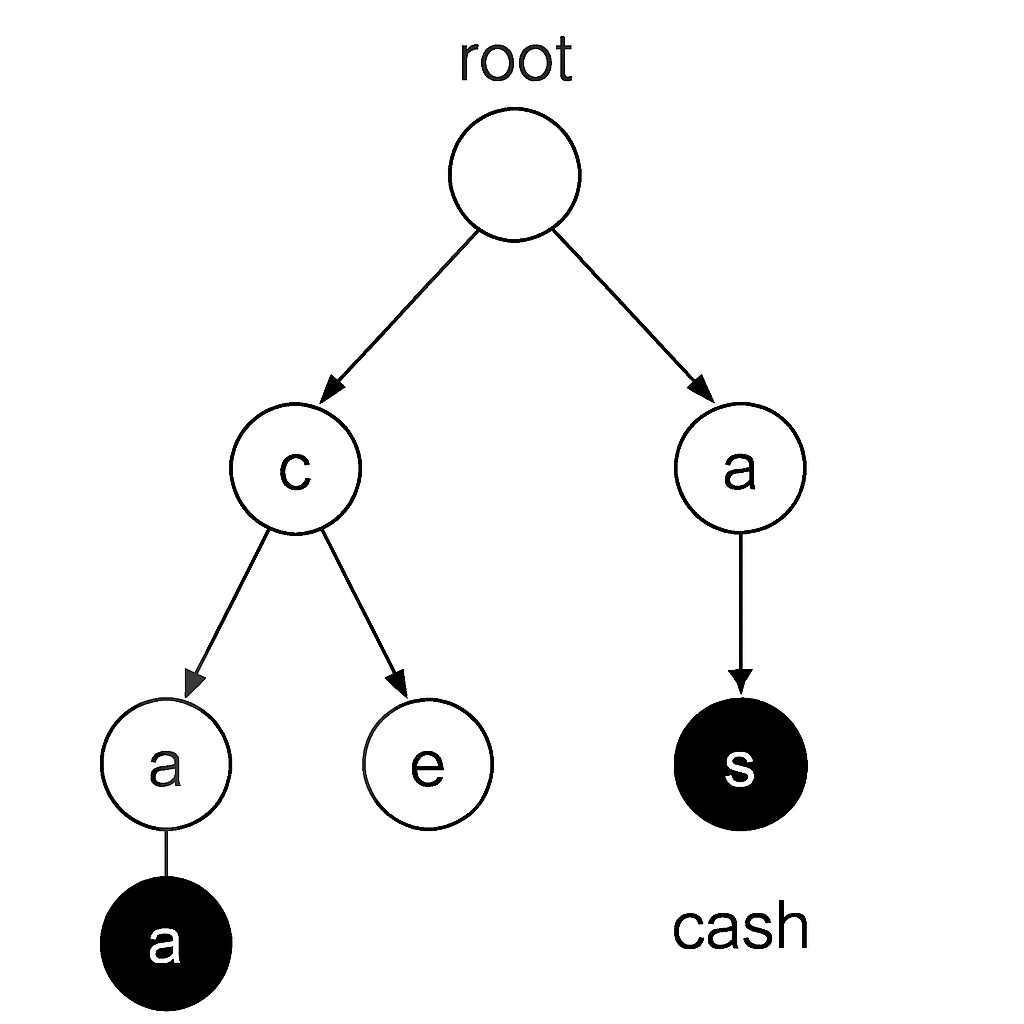

Here’s the visual representation you asked for — the trie storing Car, Care, and Cash is ready in the diagram above.
To help you interpret it clearly:

    - Root node: Empty, just the starting point.

    - C → a → r: Marks the word Car (the node r is flagged as an end of word).

    - C → a → r → e: Extends from Car to form Care (the node e is flagged as an end of word).

    - C → a → s → h: A separate branch from a leading to Cash (the node h is flagged as an end of word).

So the trie branches after "a":

    - One path continues with "r" (leading to "Car" and "Care").

    - Another path continues with "s" (leading to "Cash").

This structure shows how tries efficiently share common prefixes (Ca) while diverging only when necessary.

Would you like me to also show how a search operation would traverse this trie for a word like "Care" versus a prefix like "Ca"? That would make the mechanics even clearer.

So the trie branches after "a":
    - One path continues with "r" (leading to "Car" and "Care").
    - Another path continues with "s" (leading to "Cash").
    This structure shows how tries efficiently share common prefixes (Ca) while diverging only when necessary.

### 🔗 How Characters Are Linked in a Trie ?

Each node (represented by a TrieNode) contains:

    - children: A dictionary (dict) where:

    - Key = character (e.g., 'a', 'b', 'c')

    - Value = another TrieNode representing the next character in the word

This is different from:

    - Binary trees, which have fixed left and right pointers.
    
    - Linked lists, which have a single next pointer.

🧠 Example: Inserting "car

In [ ]:
node = root
node.children['c'] = TrieNode()
node = node.children['c']
node.children['a'] = TrieNode()
node = node.children['a']
node.children['r'] = TrieNode()
node = node.children['r']
node.is_end = True

So the structure looks like:

root
 └── 'c' → TrieNode
       └── 'a' → TrieNode
             └── 'r' → TrieNode (is_end = True)

Each character is dynamically linked to the next via the children dictionary. 
This allows:

      - Flexible branching: A node can have many children (not just 2 like in binary trees).

      - Efficient prefix sharing: Words like "car" and "care" share the "car" path.

🔍 Why Use a Dictionary?

      - Fast lookup: Checking if a character exists is O(1) in average case.

      - Dynamic structure: You don’t need to predefine the number of children.

      - Scalable: Works well for large sets of strings with overlapping prefixes


Complete Working example 

In [28]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_end = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root 
        for ch in word:
            if ch not in node.children:
                node.children[ch] = TrieNode()
            node = node.children[ch]
        node.is_end = True 

    def search(self, word):
        node = self.root 
        for ch in word:
            if ch not in node.children:
                return False
            node = node.children[ch]
        return node.is_end

    def startsWith(self, prefix):
        node = self.root
        for ch in prefix:
            print(ch)
            if ch not in node.children:
                return False
            node = node.children[ch]
        return True
    
if __name__ == "__main__":

    trie = Trie()

    objects = ["cat", "car", "cape", "cash", "care"]

    for val in objects:
        trie.insert(val)

    print ("The strings in the dictionary are:\n", objects)
    print ()
    # print (f"search 'cat': {trie.search("cat")}")
    # print (f"search 'cap': {trie.search("cap")}")
    # print (f"search 'car': {trie.search("car")}")
    # print (f"starts with 'car': {trie.startsWith("car")}")
    # print (f"search 'ca': {trie.search("ca")}")
    print (f"starts with 'ca': {trie.startsWith("ca")}")
    print (f"starts with 'a': {trie.startsWith("a")}")
    print (f"starts with 'ac': {trie.startsWith("ac")}")
    print (f"starts with 'cas': {trie.startsWith("cas")}")
    print (f"starts with 'Ca': {trie.startsWith("Ca")}")
    # print (f"search 'do': {trie.search("do")}")    

The strings in the dictionary are:
 ['cat', 'car', 'cape', 'cash', 'care']

c
a
starts with 'ca': True
a
starts with 'a': False
a
starts with 'ac': False
c
a
s
starts with 'cas': True
C
starts with 'Ca': False


4. How to Print a Trie?

Printing a Trie means:
    Traversing all nodes
    Reconstructing words from root to leaf
    Displaying structure clearly

Method1: Print all words in Trie 

Idea:
- Use DFS 
- Maintain current prefix 
- When is_end = True, print word 


In [13]:
class TrieNode:
    def __init__ (self):
        self.children = {}
        self.isEnd = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root 
        for ch in word:
            if ch not in node.children:
                node.children[ch] = TrieNode()
            node = node.children[ch]
        node.isEnd = True

    def printWords(self):
        def dfs(node, prefix):
            if node.isEnd:
                print (prefix)

            for ch, child in node.children.items():
                dfs(child, prefix + ch)
        dfs(self.root, "")


if __name__ == "__main__":
    trie = Trie()
    trie.insert("cat")
    trie.insert("car")
    trie.insert("care")
    trie.insert("dog")

    trie.printWords()
      


cat
car
care
dog


✅ Method 2: Print Tree Structure (Indented View)
This helps visualize structure.

In [19]:
class TrieNode:
    def __init__ (self):
        self.children = {}
        self.isEnd = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root 
        for ch in word:
            if ch not in node.children:
                node.children[ch] = TrieNode()
            node = node.children[ch]
        node.isEnd = True

    def print_structure(self):
        def dfs(node, level):
            for ch, child in node.children.items():
                print(" " * level + ch + ("*" if child.isEnd else ""))
                dfs(child, level + 2)

        dfs(self.root, 0)


if __name__ == "__main__":
    trie = Trie()
    trie.insert("cat")
    trie.insert("car")
    trie.insert("care")
    trie.insert("dog")

    trie.print_structure()


c
  a
    t*
    r*
      e*
d
  o
    g*


✅ Method 3: Return Words as List (Better for Production)

In [24]:
class TrieNode:
    def __init__ (self):
        self.children = {}
        self.isEnd = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root 
        for ch in word:
            if ch not in node.children:
                node.children[ch] = TrieNode()
            node = node.children[ch]
        node.isEnd = True

    def get_all_words(self):
        result = []

        def dfs(node, prefix):
            if node.isEnd:
                result.append(prefix)

            for ch, child in node.children.items():
                dfs(child, prefix + ch)

        dfs(self.root, "")
        return result

if __name__ == "__main__":
    trie = Trie()
    trie.insert("cat")
    trie.insert("car")
    trie.insert("care")
    trie.insert("dog")

    res = trie.get_all_words()
    print (res)

['cat', 'car', 'care', 'dog']
